In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

In [13]:
# import data 
df = pd.read_excel("./data/sales_data_sample.xlsx", sheet_name="saledata")
df.head()

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,COUNTRY,DEALSIZE,Discount,Profit
0,10107,30,2,2871.00,2003-02-24,Shipped,USA,Small,0.00,41.9136
1,10121,34,5,2765.90,2003-05-07,Shipped,France,Small,0.00,219.5820
2,10134,41,2,3884.34,2003-07-01,Shipped,France,Medium,0.00,6.8714
3,10145,45,6,3746.70,2003-08-25,Shipped,USA,Medium,0.45,-383.0310
4,10159,49,14,5205.27,2003-10-10,Shipped,USA,Medium,0.20,2.5164


### 1. Hãy cho biết kích thước của dữ liệu
Đáp án: (2823 dòng, 10 cột)

In [5]:
df.shape

(2823, 10)

### 2. Hãy cho biết hóa đơn 10107 có bao nhiêu dòng sản phẩm 
Đáp án: 8 dòng

In [7]:
df[df['ORDERNUMBER'] == 10107]

# df.loc[df['ORDERNUMBER'] == 10107]

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,COUNTRY,DEALSIZE,Discount,Profit
0,10107,30,2,2871.00,2003-02-24,Shipped,USA,Small,0.0,41.9136
54,10107,39,5,3896.49,2003-02-24,Shipped,USA,Medium,0.0,298.6855
80,10107,27,4,6065.55,2003-02-24,Shipped,USA,Medium,0.0,8.0352
240,10107,21,1,3036.60,2003-02-24,Shipped,USA,Medium,0.2,11.1944
804,10107,29,6,2055.23,2003-02-24,Shipped,USA,Small,0.0,6.2152
1466,10107,25,3,2845.75,2003-02-24,Shipped,USA,Small,0.2,-10.7973
1564,10107,38,7,3155.14,2003-02-24,Shipped,USA,Medium,0.0,17.7450
2173,10107,20,8,1858.00,2003-02-24,Shipped,USA,Small,0.8,-13.8960


### 3. Hãy cho biết biểu đồ chỉ có 2 cột thuộc nhóm status nào 
Đáp án: 2 cột là Cancelled

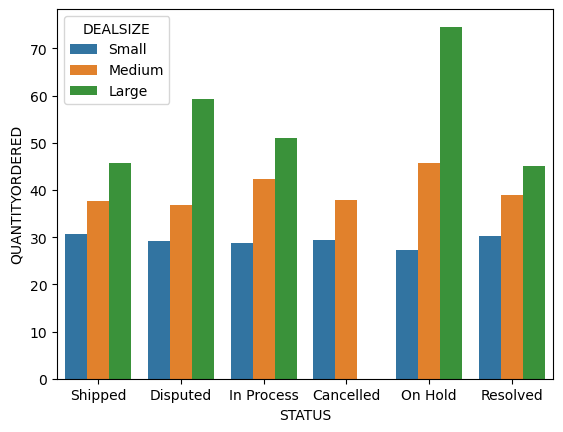

In [9]:
sns.barplot(x='STATUS' ,y='QUANTITYORDERED' , hue='DEALSIZE', data=df , errorbar= None)
plt.show()

### 4. Có mối quan hệ nào giữa trạng thái giao hàng(STATUS) và giá trị đặt hàng (SALES)

#### PR(>F) = 0.003661 < 0.05  (Đáp án có phụ thuộc)

In [10]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols

model = ols('SALES ~ STATUS',data= df ).fit()
aov_table = sm.stats.anova_lm(model,typ =1 )
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
STATUS,5.0,5.921801e+07,1.184360e+07,3.506652,0.003661
Residual,2817.0,9.514324e+09,3.377467e+06,NaN,NaN


### 5. Hãy cho biết dựa vào biểu đồ boxplot về doanh số trên từng nhóm kích thước đặt hàng thì yếu tố về kích thước đặt hành có vai trò trong việc dực báo giá trị đặt hàng hay không 
Đáp án : có 

In [12]:
# bởi vì các giá trị bán hàng khác nhau hết do đó yếu tố dealsize đóng vai trò quan trọng trong dự báo giá trị bán hàng

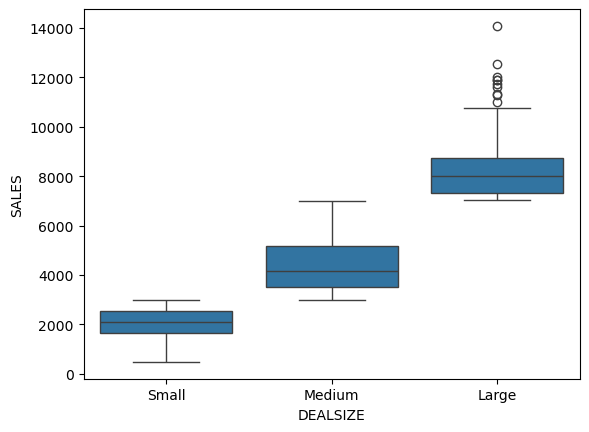

In [11]:
sns.boxplot(x='DEALSIZE', y= 'SALES', data = df)
plt.show()

### 6. Hãy cho biết dựa vào biểu đồ boxplot về doanh số trên từng nhóm kích thước đặt hàng, nếu có dữ liueej thiếu trên nhóm DEALSIZE = medium thì dữ liệu thiếu đó nên được thay thế bằng


- a. Trung binh SALES của nhóm Small 

- b. Trung binh SALES của nhóm Large 

- c. Trung binh SALES của nhóm Medium 

- d. Trung binh giá trị SALES

- e. Trung binh giá trị SALES của nhóm Small và Medium 

- f. Trung binh giá trị SALES của nhóm Large và Medium

### 7. Nếu sử dụng One Hot Encoding(định tính thành định lượng) để số hóa dữ liệu DEALSIZE thì kết quả cuối cùng là bao nhiêu

Đáp án: 0. 1. 0

In [13]:
from sklearn.preprocessing import OneHotEncoder
y = OneHotEncoder().fit_transform(df[['DEALSIZE']]).toarray()
print(y)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


### 8. Nếu sử dụng Max Absolute Scaler cho SALES thì giá trị có index =100 được scale thành bao nhiêu

Đáp án: SALES    0.212325

In [38]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit(df[["SALES"]])
scaled = scaler.transform(df[["SALES"]])
scaled_df= pd.DataFrame(scaled,columns=df[["SALES"]].columns)
print(scaled_df.iloc[50:59])

       SALES
50  0.586162
51  0.171597
52  0.293992
53  0.852174
54  0.276684
55  0.198388
56  0.234880
57  0.368744
58  0.356238


### 9. Hãy sắp xếp giảm dần theo cho mức độ lệch của SALES sau khi được transform lần lượt qua hàm log, sqrt, square và cube root(luu ý lấy giá trị tuyệt đối sort giảm dần)

In [20]:
print(df['SALES'].skew())
print(np.log(df['SALES']).skew())
print(np.sqrt(df['SALES']).skew())
print(np.square(df['SALES']).skew())
print(np.cbrt(df['SALES']).skew())

1.161076000881289
-0.2021742362869817
0.47281500087876144
2.915766495908139
0.25086487312083416


### 10.Hãy tính giá trị lệch của SALES sau khi được transform qua hàm f(x) = 1/(log(x)^2+1)
Đáp án: 0.7679976616615047

0.7679976616615047


[]

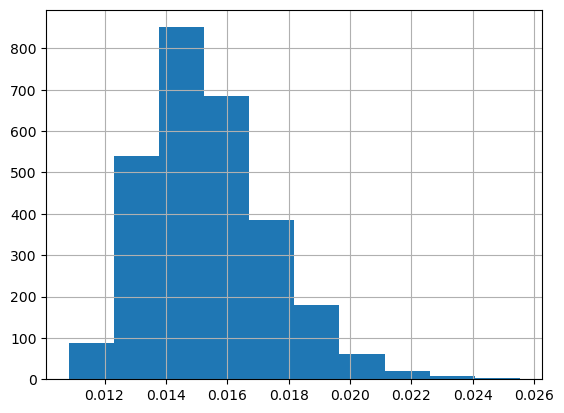

In [21]:
def fx(x): 
    return 1/(np.log(x)**2+1)

sales_trans = fx(df['SALES'])
print(sales_trans.skew())
sales_trans.hist()
plt.plot()

### 11.  Nếu sử dụng Z-Score Scaler cho SALES thì giá trị 10000 sẽ được scale thành bao nhiêu

In [6]:
from scipy.stats import zscore
df['SALES_ZSCORE'] = zscore(df['SALES'])

# Tính giá trị Z-Score của 10000
mean_sales = df['SALES'].mean()
std_sales = df['SALES'].std()
z_score_10000 = (10000 - mean_sales) / std_sales
z_score_10000.round(2)


3.5

 ### 12.
Hãy cho biết mức độ lệch của SALES sau khi được transform qua hàm log

a. Lệch nhiều hơn ban đầu

b. Lệch ngược chiều với ban đầu

c. Lệch cùng chiều với ban đầu

d. Lệch ít hơn ban đầu

e. Lệch bằng với ban đầu

f. Không lệch, tức độ lệch = 0


In [7]:
import scipy.stats as stats

# Tính độ lệch (skewness) của SALES ban đầu
skewness_before = stats.skew(df['SALES'])

# Tính độ lệch (skewness) sau khi áp dụng log transform
df['SALES_LOG'] = np.log1p(df['SALES'])  # log1p(x) = log(1 + x), giúp tránh log(0)
skewness_after = stats.skew(df['SALES_LOG'])

# Xác định mức độ thay đổi của skewness
skewness_before, skewness_after

(1.160458972499323, -0.20150542936667845)

### 13. Hãy cho biết tương quan mẫu của QUANTITYORDERED và SALES


a.
Tương quan hoàn hảo


b.
Không tương quan


c.
Tương quan


d.
Tương quan yếu


e.
Tương quan rất tốt


f.
Tương quan nghịch


g.
Tương quan thuận

In [8]:
# Tính hệ số tương quan giữa QUANTITYORDERED và SALES
correlation = df[['QUANTITYORDERED', 'SALES']].corr().iloc[0, 1]

# Xác định mức độ tương quan
correlation

0.551426191918359

### 14. Hãy cho biết trung bình doanh số ở trạng thái giao hàng là "hold on" có màu gì 

C:\Users\tizga\AppData\Local\Temp\ipykernel_10808\2076778094.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_sales_by_status.index, y=average_sales_by_status.values, palette="viridis")


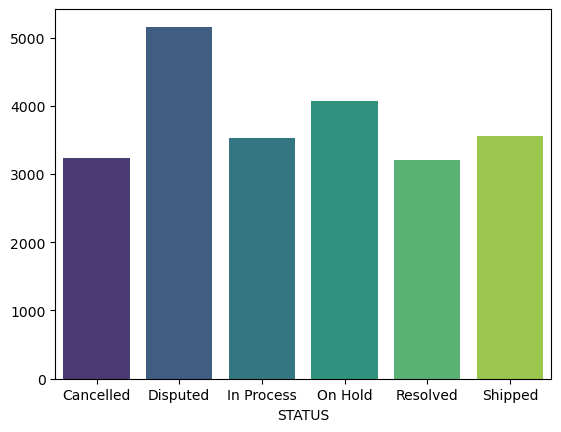

In [49]:

average_sales_by_status = df.groupby('STATUS')['SALES'].mean()
average_sales_by_status

sns.barplot(x=average_sales_by_status.index, y=average_sales_by_status.values, palette="viridis")


plt.show()


### 15. You said:
Nếu sử dụng Min-Max Scaler cho SALES thì giá trị có index từ 50 đên 59 được scale thành bao nhiêu

a.
0.571492 0.142230 0.268965 0.846934 0.251044 0.169972 0.207757 0.346367 0.333417 0.233724


b.
0.571492 0.142230 0.268965 0.846934 0.251044 0.169972 0.207757 0.346367 0.333417 1.233724


c.
0.971492 0.142230 0.268965 0.846934 0.251044 0.169972 0.207757 0.346367 0.333417 0.233724


d.
0.571492 0.142230 1.268965 0.846934 0.251044 0.169972 0.207757 0.346367 0.333417 0.233724


e.
1.571492 0.142230 0.268965 0.846934 0.251044 0.169972 0.207757 0.346367 0.333417 0.233724
đáp án nào là đáp án đúng

In [37]:
from sklearn.preprocessing import MinMaxScaler

# Áp dụng Min-Max Scaler cho cột SALES
scaler = MinMaxScaler()
df['SALES_MINMAX'] = scaler.fit_transform(df[['SALES']])

# Lấy giá trị được scale của các index từ 50 đến 59
scaled_values = df.loc[50:59, 'SALES_MINMAX'].values

# Hiển thị kết quả
scaled_values

array([0.5714917 , 0.14223049, 0.26896469, 0.84693401, 0.25104351,
       0.16997177, 0.20775741, 0.34636676, 0.3334174 , 0.23372378])